# Report V

In this report we are going to examine the model that i created and how the structural polarization measures fail while measuring the polarization. For further understanding of how the model works please do not hesitate the visit our [GitHub](https://github.com/welkiej7/EksiPol) page. 


## Settings

Let us assume a society or a social media of that society (e.g. Twitter in Türkiye). We are going to set up different types of networks and and how phenomena like topic alignment, homophily, topic distribution effects the structure of the follower - following and retweet network. As a result we are also going to investigate the community structure and how polarization measures react on it.

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 19350.88it/s]


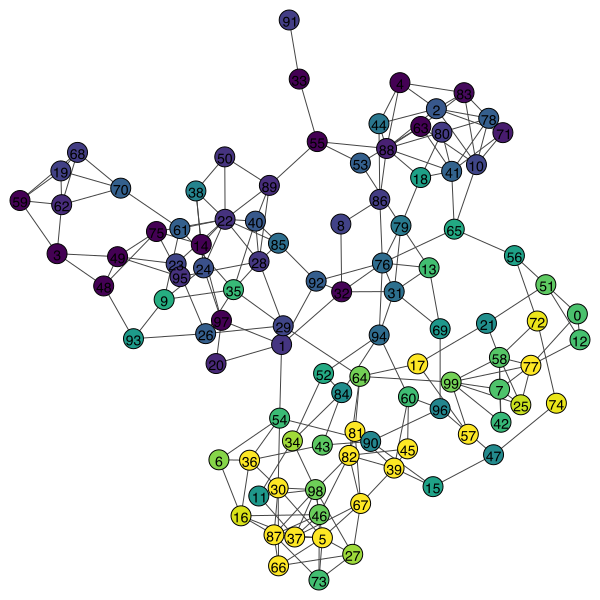

In [1]:
from user_space_generators import generate_aligned_user_space_mixed, generate_user_space_mixed
from network_generators import SEQ_GENERATOR
import numpy as np 
import igraph as ig 



USER_SPACE = generate_aligned_user_space_mixed(100, 2, 6, 2, alignment_strength= 0.2 )
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 5, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(100, observe_all= True)
ALIGNED.PLOT(2)
ig.plot(ALIGNED.network, vertex_color = ALIGNED.network.vs["color"], layout = ALIGNED.layout)



Above is a follower and following network generated with strong homophily, strong topic alignment and 2 Non Polarized, 2 Polarized and 2 Irrelevant topics. Colors represent the node similarity in the selected topic. Note that although there is gradual flow from purple to yellow, there are still green nodes as in the boundaries of purple and yellow and inside the yellow. This is due to the properties of those users besides the selected topic. Lets sample a retweet network from this network.

## Sampling a Retweet Network for the Polarized Topic

In this example we are sampling a retweet network for the follower network above. Users have two probabilities, either they get information from their feed such as their "discover" pages. Or they can see the tweet made by the users that they follow. If you increase the echo chamber parameter they only see the tweets from the users that they follow. If you decrease it they can observe the network. Colors still represent their position in a polarized topic. If we sample a retweet network in a polarized topic while keeping the echo chamber effect is strong we get the following network.

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 57940.38it/s]


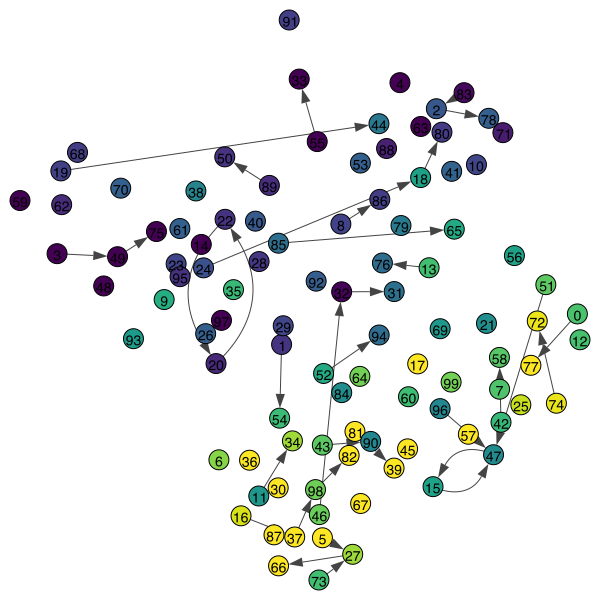

In [2]:
ALIGNED.generate_a_retweet_network(4, 0.9, 0.5, 0.1, 100) # Due to rounding the mean can be second decimal off. 
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

The connections are pretty similar and they only happen in the echo chamber. Nonetheless if we keep every parameter as it is and change the topic to a non polarized topic we get the following network.

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 50735.50it/s]


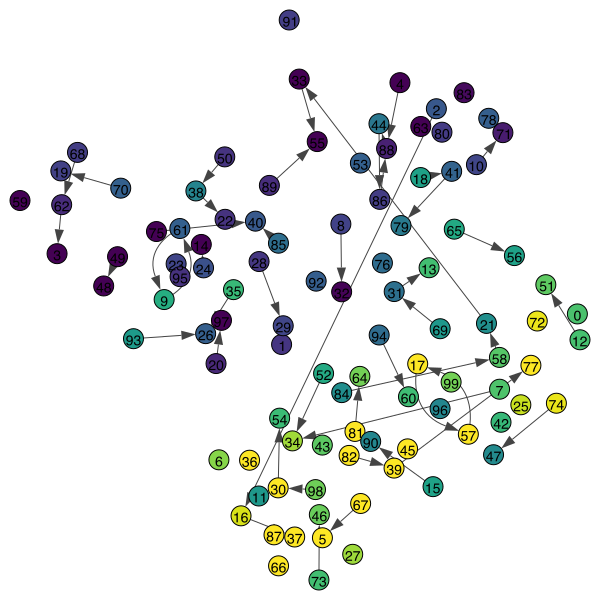

In [3]:
ALIGNED.generate_a_retweet_network(1, 0.9, 0.5, 0.1, 100) # Due to rounding the mean can be second decimal off. 
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

In this network, across different types of users, even though echo chamber effect is strong, increases. If we let users to observe the network in a better sense, if we decrease their echo chamber effect this interaction gets more homogenous. Note that we are not changing their opinions, we are just letting them observe a wider network in a non polarized topic.

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 30920.04it/s]


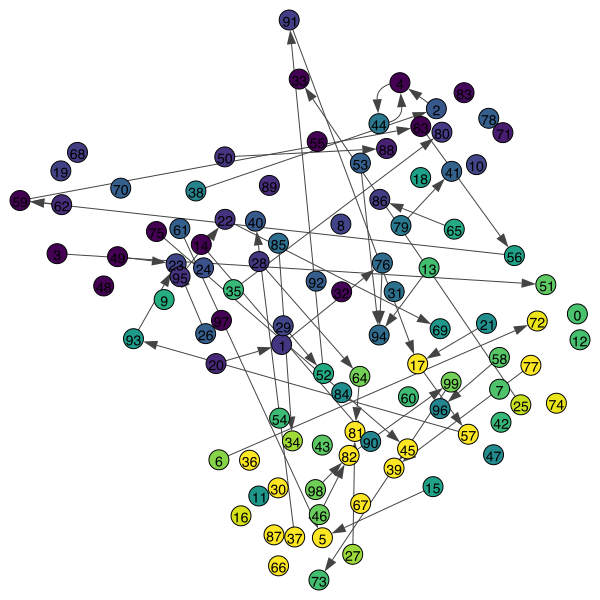

In [4]:
ALIGNED.generate_a_retweet_network(1, 0.2, 0.5, 0.1, 100) # Due to rounding the mean can be second decimal off. 
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

Nonetheless, if we make the topic polarized their interaction, even if they are observing the wider network stays inside the community or similar nodes.

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 27336.92it/s]


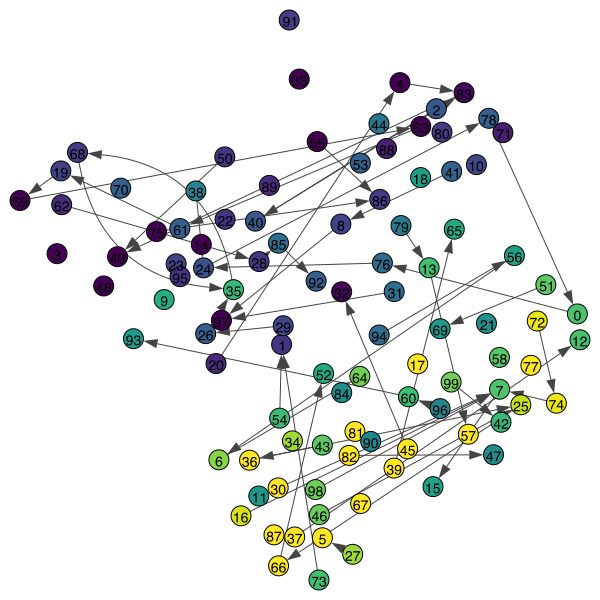

In [5]:
ALIGNED.generate_a_retweet_network(3, 0.3, 0.5, 0.1, 100) # Due to rounding the mean can be second decimal off. 
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

## Are People in Non Polarized Topics Retweet According to the Their Opinions in Non Polarized Topics or Polarized Topics?

Casting Votes...:   0%|          | 0/100 [00:00<?, ?it/s]

Casting Votes...: 100%|██████████| 100/100 [00:00<00:00, 18450.29it/s]


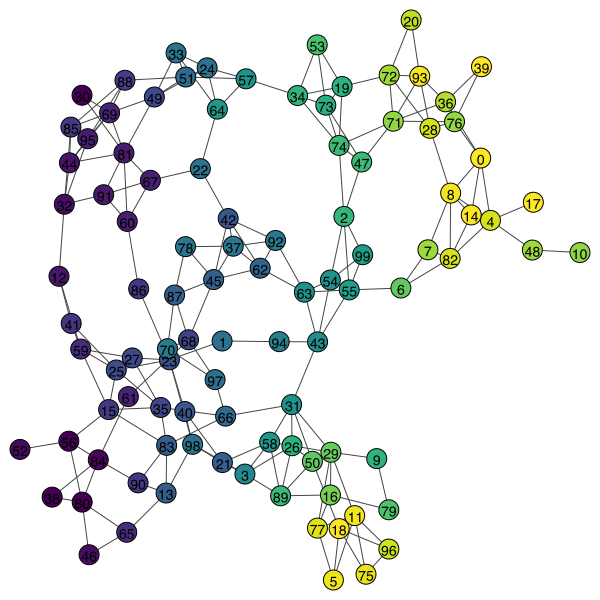

In [6]:
from user_space_generators import generate_aligned_user_space_mixed, generate_user_space_mixed
from network_generators import SEQ_GENERATOR
import numpy as np 
import igraph as ig 



USER_SPACE = generate_aligned_user_space_mixed(100, 2, 8, 2, alignment_strength= 0.04 )
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 5, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(1000, observe_all= True)
ALIGNED.PLOT(2)
ig.plot(ALIGNED.network, vertex_color = ALIGNED.network.vs["color"], layout = ALIGNED.layout)


The above is a polarized network and we can see the colors in different communties. These colors represent their opinions in a POLARIZED topic. Now let them retweet about the polarized topic while echo chamber effect takes place.

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 15608.45it/s]


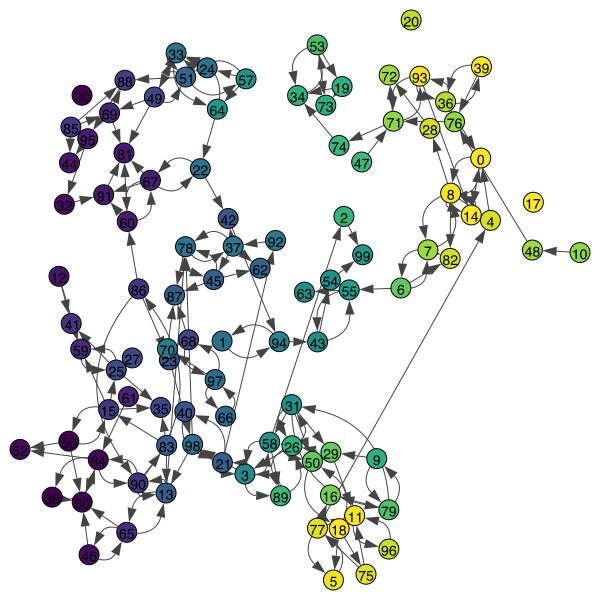

In [7]:
ALIGNED.generate_a_retweet_network(3, 0.95, 1.6, 1, HPOW= 100)
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

As expected, their retweet patterns are generally inside the communities. Now let them retweet about a subject that they are not polarized. 

Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 20911.92it/s]


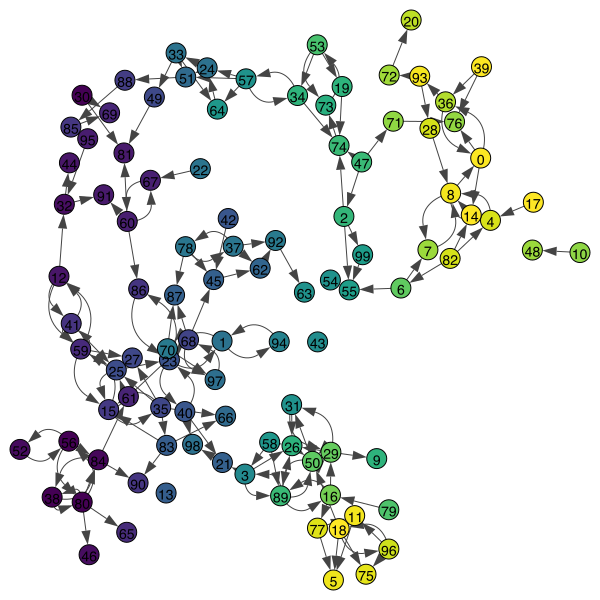

In [8]:
ALIGNED.generate_a_retweet_network(0, 1, 1.6, 1, HPOW= 100)
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

Although they are not polarized about the subject they are still retweeting within the communities. Nonetheless the real distribution of the opinions in the network can be shown if we show the distribution of the subjects in the non polarized topic. 

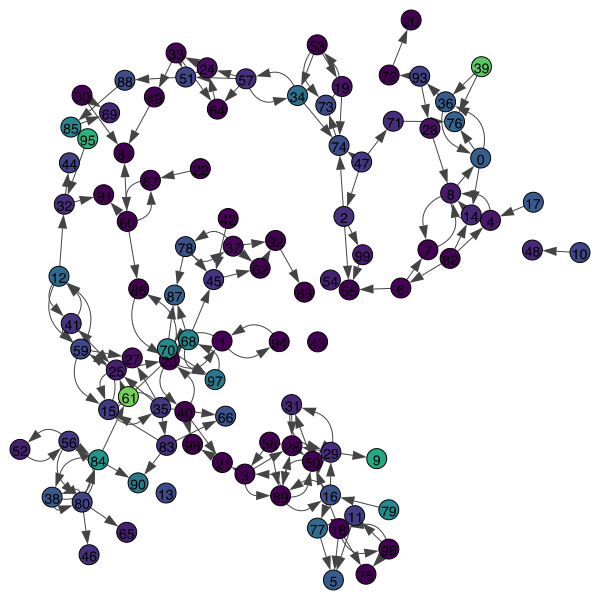

In [9]:
ALIGNED.PLOT(0)
ig.plot(ALIGNED.retweet_network, vertex_color = ALIGNED.network.vs["color"], 
        vertex_label = ALIGNED.network.vs["label"], layout = ALIGNED.layout)

Although the flows are happening inside the communities according to the polarized subject, now the node metadata shows that their opinions does not differ that much. Hence the network is not POLARIZED in that topic. 


We can measure the distance between the nodes in a non polarized topic as the echo chamber effect and the homophily changes. Each time, they have to connect to the node in their echo chamber, thus polarizing topics cause non polarized topics to look like polarized. Even though they are not polarized.


Retweeting...: 100%|██████████| 100/100 [00:00<00:00, 36902.20it/s]


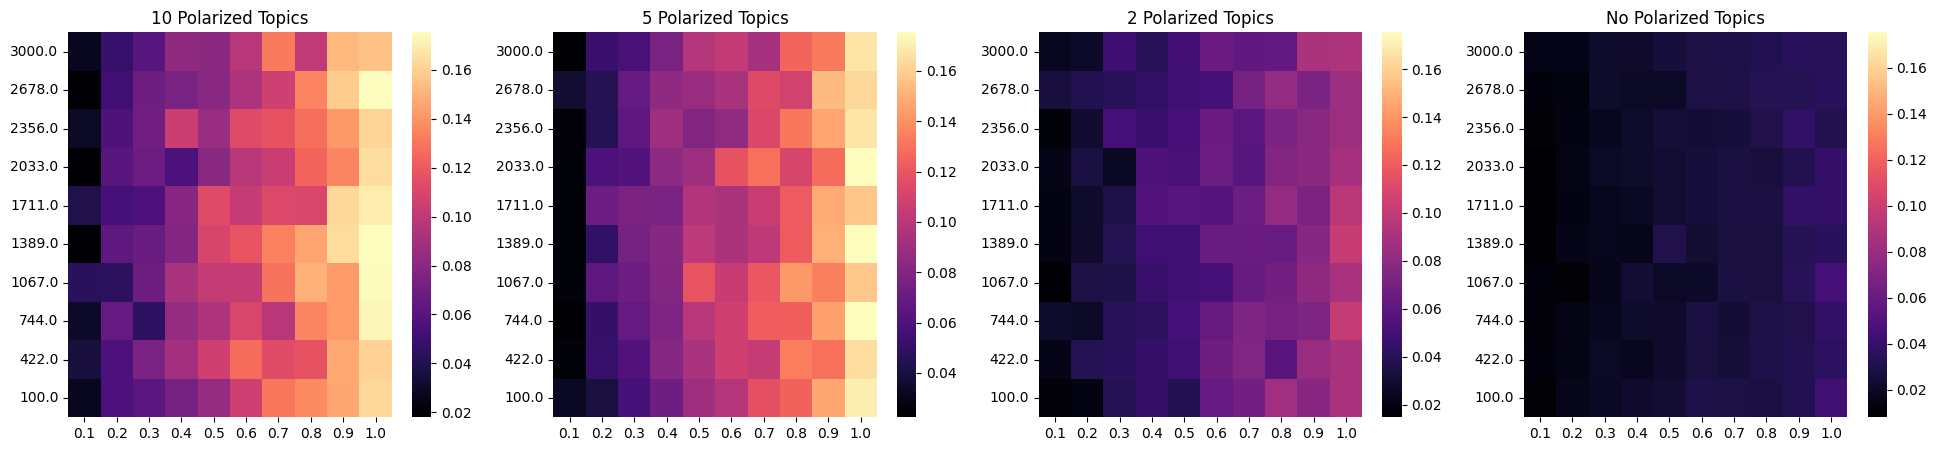

In [106]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

USER_SPACE = generate_aligned_user_space_mixed(100, 2, 10, 2, alignment_strength= 0.1)
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 4, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(1000, observe_all= True)
RESULTS_MAIN = {}
IT = 0
for HPOWW in np.linspace(100,3000,10):
    try:
        for echo_effect_size in np.linspace(0.1,1,10):
                ALIGNED.generate_a_retweet_network(0, echo_effect_size, 1, 0.8, HPOW= HPOWW)
                RES = ALIGNED.CALCULATE_SEPERATION(0)
                IT += 1
                RESULTS_MAIN.update({IT:{'HOMO':HPOWW,'EE':echo_effect_size,'RESULT':RES}})
    except:
        continue

RESULTS = [RESULTS_MAIN[i]['RESULT'] for i in RESULTS_MAIN]
HOMO = [RESULTS_MAIN[i]['HOMO'] for i in RESULTS_MAIN]
EE = [RESULTS_MAIN[i]['EE'] for i in RESULTS_MAIN]
import seaborn as sns
import matplotlib.pyplot as plt 
y_labels = [np.round(i) for i in np.linspace(100,3000,10)]
y_labels.sort(reverse= True)
MAX_VAL = np.max(np.array(RESULTS).reshape((10,10)))
sns.heatmap(np.array(RESULTS).reshape((10,10)), 
            xticklabels= [np.round(i,2) for i in np.linspace(0.1,1,10)],
            yticklabels = y_labels, cmap= 'magma', ax= axes[0])

axes[0].set_title('10 Polarized Topics')

USER_SPACE = generate_aligned_user_space_mixed(100, 2, 5, 2, alignment_strength= 0.1) # No Polarized Topic
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 4, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(1000, observe_all= True)
RESULTS_MAIN = {}
IT = 0
for HPOWW in np.linspace(100,3000,10):
    try:
        for echo_effect_size in np.linspace(0.1,1,10):
                ALIGNED.generate_a_retweet_network(0, echo_effect_size, 1, 0.8, HPOW= HPOWW)
                RES = ALIGNED.CALCULATE_SEPERATION(0)
                IT += 1
                RESULTS_MAIN.update({IT:{'HOMO':HPOWW,'EE':echo_effect_size,'RESULT':RES}})
    except:
        continue

RESULTS = [RESULTS_MAIN[i]['RESULT'] for i in RESULTS_MAIN]
HOMO = [RESULTS_MAIN[i]['HOMO'] for i in RESULTS_MAIN]
EE = [RESULTS_MAIN[i]['EE'] for i in RESULTS_MAIN]
import seaborn as sns
import matplotlib.pyplot as plt 
y_labels = [np.round(i) for i in np.linspace(100,3000,10)]
y_labels.sort(reverse= True)
sns.heatmap(np.array(RESULTS).reshape((10,10)), 
            xticklabels= [np.round(i,2) for i in np.linspace(0.1,1,10)],
            yticklabels = y_labels, cmap= 'magma', vmax = MAX_VAL, ax= axes[1])
axes[1].set_title('5 Polarized Topics')


USER_SPACE = generate_aligned_user_space_mixed(100, 2, 2, 0, alignment_strength= 0.1) # No Polarized Topic
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 4, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(1000, observe_all= True)
RESULTS_MAIN = {}
IT = 0
for HPOWW in np.linspace(100,3000,10):
    try:
        for echo_effect_size in np.linspace(0.1,1,10):
                ALIGNED.generate_a_retweet_network(0, echo_effect_size, 1, 0.8, HPOW= HPOWW)
                RES = ALIGNED.CALCULATE_SEPERATION(0)
                IT += 1
                RESULTS_MAIN.update({IT:{'HOMO':HPOWW,'EE':echo_effect_size,'RESULT':RES}})
    except:
        continue

RESULTS = [RESULTS_MAIN[i]['RESULT'] for i in RESULTS_MAIN]
HOMO = [RESULTS_MAIN[i]['HOMO'] for i in RESULTS_MAIN]
EE = [RESULTS_MAIN[i]['EE'] for i in RESULTS_MAIN]
import seaborn as sns
import matplotlib.pyplot as plt 
y_labels = [np.round(i) for i in np.linspace(100,3000,10)]
y_labels.sort(reverse= True)
sns.heatmap(np.array(RESULTS).reshape((10,10)), 
            xticklabels= [np.round(i,2) for i in np.linspace(0.1,1,10)],
            yticklabels = y_labels, cmap= 'magma', vmax = MAX_VAL, ax= axes[2])
axes[2].set_title('2 Polarized Topics')

USER_SPACE = generate_aligned_user_space_mixed(100, 2, 0, 0, alignment_strength= 0.1) # No Polarized Topic
ALIGNED = SEQ_GENERATOR(USER_SPACE)
ALIGNED.accept_deg_dist([int(i) for i in np.round(np.random.uniform(low = 1, high = 4, size = ALIGNED.user_space.shape[0]))])
ALIGNED.calculate_similarity(method = 'euc', normalize= True)
ALIGNED.connect_sequential(1000, observe_all= True)
RESULTS_MAIN = {}
IT = 0
for HPOWW in np.linspace(100,3000,10):
    try:
        for echo_effect_size in np.linspace(0.1,1,10):
                ALIGNED.generate_a_retweet_network(0, echo_effect_size, 1, 0.8, HPOW= HPOWW)
                RES = ALIGNED.CALCULATE_SEPERATION(0)
                IT += 1
                RESULTS_MAIN.update({IT:{'HOMO':HPOWW,'EE':echo_effect_size,'RESULT':RES}})
    except:
        continue

RESULTS = [RESULTS_MAIN[i]['RESULT'] for i in RESULTS_MAIN]
HOMO = [RESULTS_MAIN[i]['HOMO'] for i in RESULTS_MAIN]
EE = [RESULTS_MAIN[i]['EE'] for i in RESULTS_MAIN]
import seaborn as sns
import matplotlib.pyplot as plt 
y_labels = [np.round(i) for i in np.linspace(100,3000,10)]
y_labels.sort(reverse= True)
sns.heatmap(np.array(RESULTS).reshape((10,10)), 
            xticklabels= [np.round(i,2) for i in np.linspace(0.1,1,10)],
            yticklabels = y_labels, cmap= 'magma', vmax = MAX_VAL, ax= axes[3])
axes[3].set_title('No Polarized Topics')

plt.show()